# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

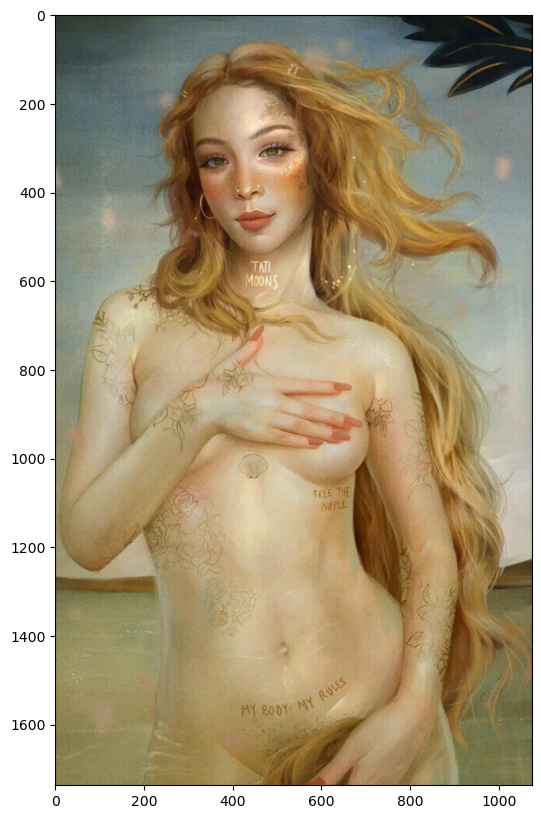

In [49]:
img = cv2.imread('girl2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

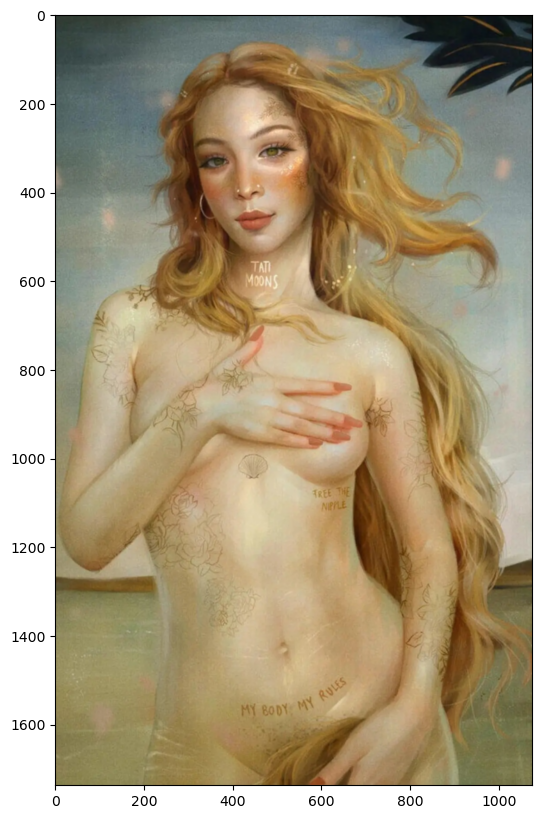

In [50]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)

unsharp = np.zeros_like(img)
unsharp = cv2.GaussianBlur(img, ksize=(3,3), sigmaX=5)
plt.imshow(unsharp)

[[ 47  47  48 ...  14  13  13]
 [ 47  47  48 ...  16  16  16]
 [ 47  47  48 ...  16  16  16]
 ...
 [130 128 132 ... 122 117 114]
 [130 128 132 ... 121 117 113]
 [131 129 131 ... 120 114 112]]
[[ 47  47  48 ...  14   0   0]
 [ 47  47  48 ...  31  31  31]
 [ 47  47  48 ...  31  31  31]
 ...
 [145 113 147 ... 152 117  84]
 [145  98 147 ... 151 117  83]
 [146 114 131 ... 135  84  67]]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x23ae4986dc0>)

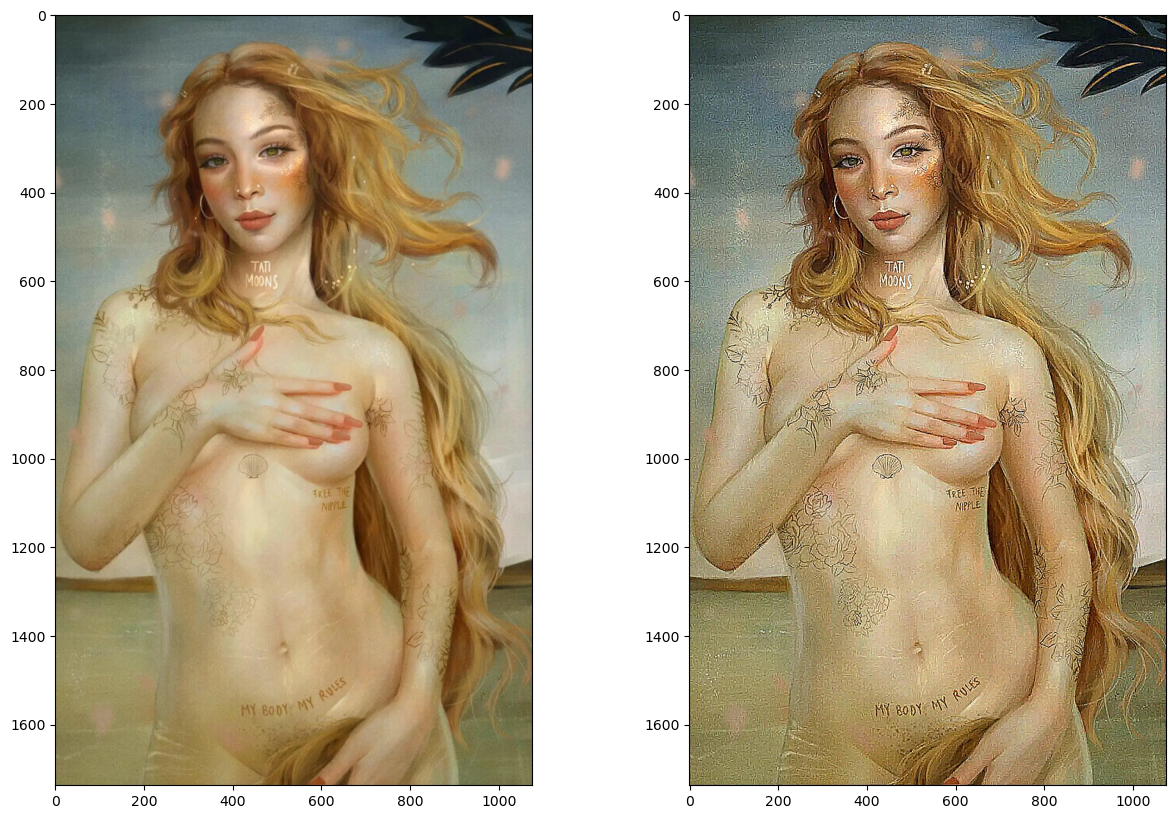

In [67]:
def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):

    # Create the unsharp image

    blurred = cv2.GaussianBlur(image, kernel_size, sigma)

    # Create the difference image (original − unsharp)
    # Note: Remember that you are working with uint8 data types. Any addition or substractions
    # might result in overflow or underflow, respectively. You can prevent this by casting the images to float.

    # Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
    # Note: Again, take care of underflows/overflows if necessary.

    sharpened = image + float(amount) * image - float(amount) * blurred

    #return sharpened

    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

img1 = unsharp_mask(img,(5,5),1,15,0)


print (img[:,:,0])
print (img1[:,:,0])

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(img1)



### Questions
* What is a good (reasonable) value for the `amount` parameter?

The reasonable value for the value is within 50-150%



 * What happens if it is too small?

sharpened = original + (original − blurred) × amount.

If the 'amount' is too small there will be not much to change in the  part [(original − blurred) × amount] so image will be almost the same

 * What happens if it is too large?

 Edges will become too much dark or too much bright

 

 



 
 